([], [])

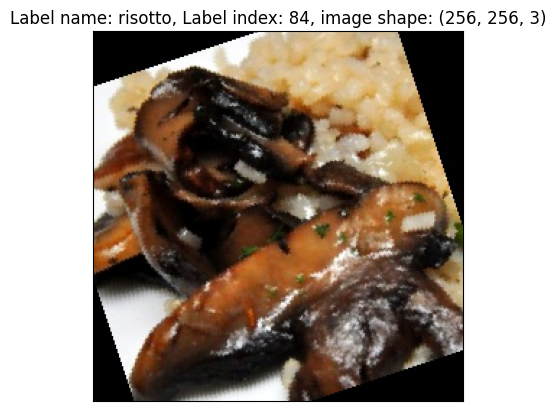

In [1]:
import matplotlib.pyplot as plt
import pickle

info = pickle.load(open('val.pkl', 'rb')) # try train.pkl and val.pkl
label_name = info['label']
label_id = info['id']
path = info['path']

idx = 13 # try various index values
image_fp = path[idx]
image = plt.imread(image_fp)

plt.imshow(image)
plt.title('Label name: {}, Label index: {}, image shape: {}'.format(label_name[idx], label_id[idx], str(image.shape)))
plt.xticks([])
plt.yticks([])

### Import Packages
- Our test code will rely only on below packages.

In [2]:
import os
import sys
import pickle
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms

from PIL import Image

from model import MyModel
from utils import score, load_checkpoint, reset, count_parameters

### Define data path
- Your code should work well with `val.pkl` file.
- We have our own `test.pkl` file for scoring, and it will not be shared to students.

In [3]:
test_data_path = 'val.pkl'

with open(test_data_path, 'rb') as file:
    test_data = pickle.load(file)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 256

### Define Test Dataset class

In [4]:
class TestDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data['path'])

    def __getitem__(self, idx):

        sample = dict()

        img_path = self.data['path'][idx]

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)


        sample['img'] = image
        sample['id'] = self.data['id'][idx]
        sample['label'] = self.data['label'][idx]

        return sample

### Define default transform for test
- We will use `test_transforms` for testing your code.


In [5]:
test_transforms = transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_dataset = TestDataset(test_data, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=8)

### Define test function

In [6]:
def test(model, sample):
    model.eval()

    with torch.no_grad():

        img = sample['img'].to(device)
        label = sample['id'].to(device)
        pred = model(img)
        num_correct = torch.sum(torch.argmax(pred, dim=-1) == label)

    return num_correct.item()

### Do the testing and calculate the score

In [7]:
reset(0)

model = load_checkpoint('./check/69_checkpoint.pth', device)

num_params = count_parameters(model)
if num_params > 20000000:
    raise ValueError("Cannot have more than 20 million parameters!")

avg_te_correct = 0
for sample in test_loader:
    te_correct = test(model, sample)
    avg_te_correct += te_correct / len(test_dataset)

print('Your accuracy: {:.02f}%'.format(avg_te_correct*100))
print('Your score: {:.02f} out of 100'.format(score(avg_te_correct*100)))

Your accuracy: 69.54%
Your score: 88.25 out of 100
